In [14]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Load Dataset and Preprocess
# Image Preprocessing & Augmentation
img_size = 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(
    "C:/Users/NIC/Desktop/DataScience/chest_xray/test",
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = "binary"
)

val_data = test_datagen.flow_from_directory(
    "C:/Users/NIC/Desktop/DataScience/chest_xray/val",
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = "binary"
)
test_data = test_datagen.flow_from_directory(
    "C:/Users/NIC/Desktop/DataScience/chest_xray/train",
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = "binary"
)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [19]:
# Build CNN model
cnn = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),   #50% of neurons will bw ignored randomly during each training step
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
# Train the model
history = cnn.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8606 - loss: 0.3525 - val_accuracy: 0.6250 - val_loss: 0.7253
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8734 - loss: 0.3146 - val_accuracy: 0.7500 - val_loss: 0.5469
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8926 - loss: 0.2715 - val_accuracy: 0.6250 - val_loss: 0.6969
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8990 - loss: 0.2552 - val_accuracy: 0.6875 - val_loss: 0.7239
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8750 - loss: 0.2759 - val_accuracy: 0.6875 - val_loss: 0.6557
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8990 - loss: 0.2690 - val_accuracy: 0.7500 - val_loss: 0.5722
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8942 - loss: 0.2533 - val_accuracy: 0.7500 - val_loss: 0.5529
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8926 - loss: 0.2558 - val_accuracy: 0.7500 - val_loss:

In [39]:
test_loss, test_acc = cnn.evaluate(test_data)
print("Test Accuracy:", test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8865 - loss: 0.2873 
Test Accuracy: 0.8865030407905579


In [40]:
# Normalize the images
train_datagen = ImageDataGenerator(rescale = 1./255, )
test_datagen = ImageDataGenerator(rescale = 1./255)

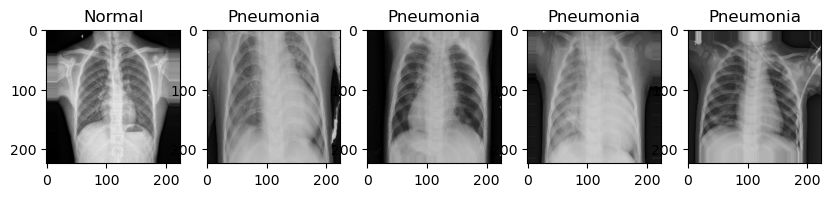

In [41]:
# Visualize the images
# Get one batch of images
images, labels = next(train_data)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title("Pneumonia" if labels[i]==1 else "Normal")  #0=Normal and 1=Pneumonia
    plt.axis("on")
plt.show()

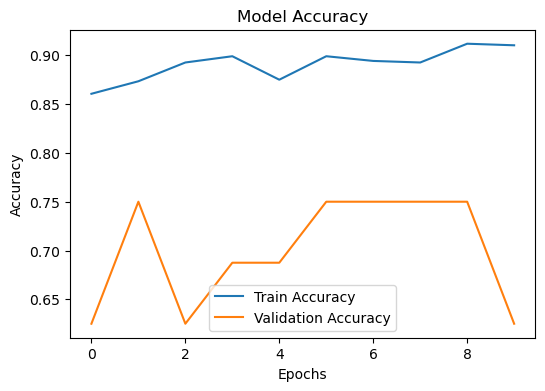

In [42]:
#Visualize training and validation accuracy
# Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


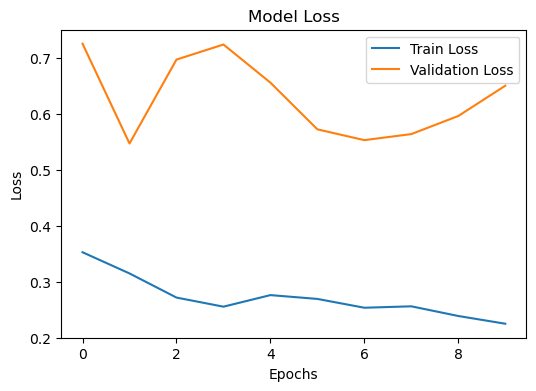

In [43]:
# Visualize training & validation loss
# Loss plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [45]:
# Predict probabilities
y_pred_prob = cnn.predict(test_data)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

# True labels
y_true = test_data.classes

82/82 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step


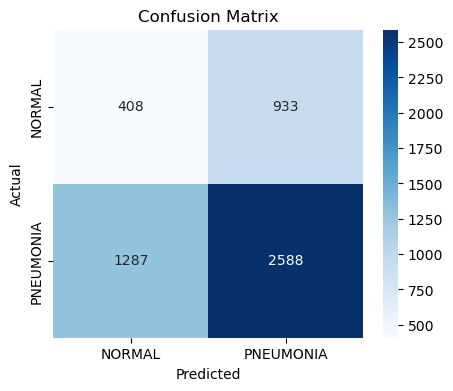

In [50]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()           

# [[TN  FP]
#  [FN  TP]]
# TN → Correctly predicted NORMAL
# FP → NORMAL predicted as PNEUMONIA
# FN → PNEUMONIA predicted as NORMAL (⚠ serious in medical)
# TP → Correctly predicted PNEUMONIA
#                 Predicted
#           | Negative  | Positive |
# Actual   |---------------------------
# Negative |    TN     |    FP    |
# Positive |    FN     |    TP    |


In [53]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names= ['NORMAL', 'PNEUMONIA']))

Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.24      0.30      0.27      1341
   PNEUMONIA       0.74      0.67      0.70      3875

    accuracy                           0.57      5216
   macro avg       0.49      0.49      0.48      5216
weighted avg       0.61      0.57      0.59      5216

